## Homework 2

Please complete the functions below. These functions are for to simulate a fair and a biased die. 

The biased die has probabilities {0.20, 0.10, 0.15, 0.15, 0.15, 0.25}.

Create 2 visualizations that shows outcomes of multiple rolls of a fair die and biased die. 
* Visualization for fair die
* Visualization for biased die

Repeat the process programatically and take the mean to create a new list. This list will be used to compare means of biased & unbiased dice. 
* Create a historgram showing means of biased & unbiased die

* Use subcharts
* All visualizations must have appropriate titles.
* There are 3 visualization and expected format is 
```
 [V1] [V2]
 [   V3  ]
 ```

In [1]:
import random 
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

trial_count = 500
mean_trials=50

def fair_die_simulation(trials):
    """
    returns an array of randomly numbers between 1 and 6. 
    """
    
    options = [1,2,3,4,5,6]
    simulations = []
    for i in range(trials):
        simulations.append(random.choice(options))
    return simulations

In [7]:
def biased_die_simuations(trials, weights=[0.20, 0.10, 0.15, 0.15, 0.15, 0.25]):
    """
    returns an array of randomly numbers between 1 and 6 with the probabilty of assosiated weight. 
    for instance: for weights: [0.25, 0.15, 0.15, 0.15, 0.15, 0.15]
    1 has 0.25 change to be selected, 2 has 0.15 chance and so on...
    """
    simulations=[]
    
    for trial in range(trials):
        key=random.random()
        sum=0
        result=1
        for x in weights:
            sum += x
            if key < sum:
                simulations.append(result)
                break
            result+=1    
    
    options = [1,2,3,4,5,6]
    
    return simulations

In [8]:
def biased_mean_sims(mean_trials,trial_count):
  mean_list = []
  for x in range(mean_trials):
    sim_result = biased_die_simuations(trial_count)
    mean_list.append(mean(sim_result))
  
  return mean_list


def fair_mean_sims(mean_trials,trial_count):
  mean_list = []
  for x in range(mean_trials):
    sim_result = fair_die_simulation(trial_count)
    mean_list.append(mean(sim_result))
  
  return mean_list


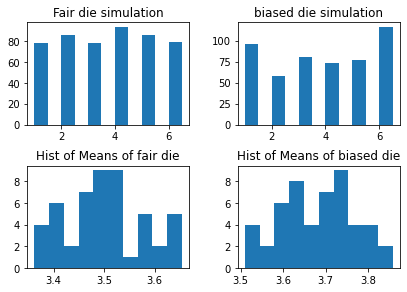

In [9]:
biased = biased_die_simuations(trial_count)
fair = fair_die_simulation(trial_count)

biased_mean_list = biased_mean_sims(mean_trials, trial_count)
unbiased_mean_list = fair_mean_sims(mean_trials, trial_count)

fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)

#define subplot titles
ax[0, 0].set_title('Fair die simulation')
ax[0, 1].set_title('biased die simulation')
ax[1, 0].set_title('Hist of Means of fair die')
ax[1, 1].set_title('Hist of Means of biased die')
ax[0][0].hist(fair, bins=np.arange(2, 14)/2)
ax[0][1].hist(biased, bins=np.arange(2, 14)/2)
ax[1][0].hist(unbiased_mean_list)
ax[1][1].hist(biased_mean_list)


plt.show()
